# Нелинейный метод наименьших квадратов
## Задача.
Нелинейным методом наименьших квадратов построить модели вида: 
$
y = \beta_1 e^{-\beta_2 x}
\qquad
\mbox{и}
\qquad
y = \beta_1 e^{\frac{\beta_2}{x+\beta_3}}
$  
для данных, приведенных в таблице
```
  x         y    
----------------                
 50      347804    
 55       28610    
 60       23650    
 65       19630    
 70       16370    
 75       13720    
 80       11540    
 85        9744    
 90        8261    
 95        7030    
100        6005    
105        5147    
110        4427    
115        3820    
120        3307    
125        2872    
```
Найти общую ошибку в каждом из этих случаев и сравнить результаты.

## Решение.
Решение стоит начать с пояснения метода наименьших квадратов (МНК).  
Рассмотрим его относительно нашей задачи.  
Каждая функция дает систему из 16 уравнений вида:
\begin{equation*}
 \begin{cases}
   y_1 = \beta_1 e^{-\beta_2 x_1}\\
   y_2 = \beta_1 e^{-\beta_2 x_2}\\
    ......\\
    y_{16} = \beta_1 e^{-\beta_2 x_{16}}\\
 \end{cases}
\qquad
\mbox{и}
\qquad
\begin{cases}
   y_1 = \beta_1 e^{\frac{\beta_2}{x_1+\beta_3}}\\
   y_2 = \beta_1 e^{\frac{\beta_2}{x_2+\beta_3}}\\
    ......\\
   y_{16} = \beta_1 e^{\frac{\beta_2}{x_{16}+\beta_3}}
 \end{cases}
\end{equation*}
Несложно заметить, что каждая из систем уравнений является нелинейной, отсюда можно понять, что единственного (точного) 
решения систем не существует$^{[1]}$.
Но можно подобрать такие значения, которые наиболее близко будут аппроксимировать наши системы.
Оговорюсь, что системы я рассматриваю по отдельности. Для того, чтобы понять,
насколько хорошо те или иные решения аппроксимируют нашу систмеу, и используется метод наименьших квадратов  
Пусть $f_i(\beta, x_i) = \beta_1 e^{-\beta_2 x_i}, i = 1,2..16$, тогда МНК будет выглядит слеущим образом:  
<tex>$$\sum_{i=1}^{16} (y_i - f_i(\beta, x_i))^2 \to \min_{\beta}$$</tex>  
### Решение систем нелинейных уравнений
Аналитически такие системы нельзя решить в общем виде, поэтому для них ищут приближенной решение с помощью численных методов$^{[1]}$. 
Одним из таких явялется алгоритм Гаусса-Ньютона. Он итеративно находит значения переменных, которые минимизируют сумму квадратов.
Сначала задается начальное приближение $\beta^{(0)}$, затем происходит итераивное вычисление следущих значений по формуле: 
$$\beta^{(k+1)} = \beta^{(k)} - (J^T(r)*J(r))^{-1}*J^T(r)*r(\beta^{(k)})$$
Где, $J(r)$ - матрица Якоби для нашей функции  
$r(\beta) = y - f(\beta, x)$ то есть $r(\beta)$ - это вектор-столлбец отклонений функции от заданного значения  
$k$ - номер итерации

In [231]:
# подключаем библеотеки
import numpy as np  # для использования массивов
from math import *  # для числа e
import matplotlib.pyplot as plt # для построения графиков
import scipy.linalg as linalg # дает возможность получить обратную матрицу

In [232]:
# наша функция для построения графика
def func(x, b):
    return b[0,0]*exp(1)**(-1*b[1,0]*x)
# подсчет ошибки методом наименьших квадратов
def LSM(b):
    i = 0
    res = 0
    while i < 16:
        res += (-yT[i] + b[0,0]*exp(-b[1,0]*xT[i]))**2 
        i += 1
    return res
# вектор-столлбец отклонений функции от заданного значения
def r(b):
    res = np.zeros([16, 1])
    i = 0
    while i < 16:
        res[i,0] = -yT[i] + b[0,0]*exp(-b[1,0]*xT[i])
        i += 1
    return res
# подсчет матрици Якоба
def jac(b):
    res = np.zeros([16,2])
    i = 0
    while i < 16:
        res[i, :] = exp(1)**(-b[1, 0]*xT[i]), -xT[i]*b[0, 0]*b[1, 0]*exp(1)**(b[1, 0]*xT[i])
        i += 1
    return res
# алгоритм Гаусса-Ньютона
def gaus_newton(b): 
    res = b - linalg.inv(jac(b).transpose() @ jac(b)) @ jac(b).transpose() @ r(b)
    return res

[[2.01101452e+05]
 [3.55200082e-02]]


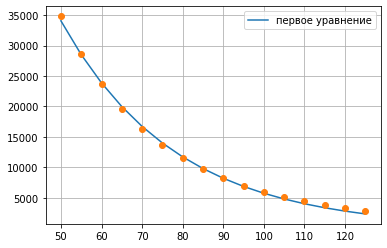

In [233]:
# задаем стартовые параметры
yT = [34804, 28610, 23650, 19630, 16370, 13720, 11540, 9744, 8261, 7030, 6005, 5147, 4427, 3820, 3307, 2872]
xT = np.arange(50, 130, 5)
beta = np.array([[1000], [0.05]])
betaBest = np.zeros([2,1])
toFindErr = np.zeros([2])
j  = 0 
while True:
    beta = gaus_newton(beta)
    j += 1
    if LSM(beta) < LSM(betaBest):  # после нахождения новго значения проверяем, лушче ли оно прошлого
        betaBest = beta  # если лучше, то записываем
        jNow = j
    else:  # иначе считаем, как давно мы записывали прошлое значение
        if j - jNow > j / 10:  # если с тех пор прошло относительно много иетраций,
            beta = betaBest  # то мы уже нашли лучшее решение и нужно выходить
            break
print(beta)
toFindErr[0] = beta[0,0]  # для красивого отображения далее
toFindErr[1] = beta[1,0]
plt.plot(xT, func(xT, beta), label = 'первое уравнение')
plt.plot(xT,yT, 'o')
plt.grid()
plt.legend()

Как видно на графике, алгоритм Гаусса-Ньютона дал достаточно точные значения для $\beta$  
Однако так было не сразу, так как этот алгоритм (как и многие другие), очень сильно зависит от стартовых парматеров, то
если задать $\beta_1, \beta_2$ равные 1000 и 0.02, то решение будет сильно искажено.  

[[6.49227121e+09]
 [2.38914613e-01]]


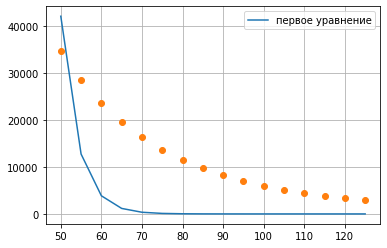

In [234]:
beta = np.array([[1000], [0.02]])
betaBest = np.zeros([2,1])
j  = 0 
while True:
    beta = gaus_newton(beta)
    j += 1
    if LSM(beta) < LSM(betaBest):  # после нахождения новго значения проверяем, лушче ли оно прошлого
        betaBest = beta  # если лучше, то записываем
        jNow = j
    else:  # иначе считаем, как давно мы записывали прошлое значение
        if j - jNow > j / 10 + 10:  # если с тех пор прошло относительно много иетераций,
            beta = betaBest  # то мы уже нашли лучшее решение и нужно выходить
            break
print(beta)
plt.plot(xT, func(xT, beta), label = 'первое уравнение')
plt.plot(xT,yT, 'o')
plt.grid()
plt.legend()

Таким образом гланым недостатком стала необходимость, достаточно точно подобрать статовые значения. Если для первой функции 
с двумя неизвестными мне это удалось, то для другой - нет

In [235]:
def func(x, b):
    return b[0,0]*exp(1)**(b[1,0]/(x+b[2,0]))
def LSM(b):
    i = 0
    res = 0
    while i < 16:
        res += (-yT[i] + b[0,0]*exp(1)**(b[1,0] / (xT[i] + b[2,0])))**2
        i += 1
    return res
def r(b):
    res = np.zeros([16, 1])
    i = 0
    while i < 16:
        res[i, 0] = -yT[i] + b[0,0]*exp(1)**(b[1,0] / (xT[i] + b[2,0]))
        i += 1
    return res
def jac(b):
    i = 0
    res = np.zeros([16, 3])
    while i < 16:
        res[i, 0] = exp(1)**(b[1,0] / (xT[i] + b[2,0]))
        res[i, 1] = (b[0,0] * exp(1)**(b[1,0]/(xT[i] + b[2,0]))) / (xT[i] + b[2,0])
        res[i, 2] = -((b[0,0] * b[1,0] * exp(1)**(b[1,0] / (xT[i] + b[2,0]))) / (xT[i] + b[2,0])**2)
        i += 1
    return res
def newton(b):
    res = b - (linalg.inv(jac(b).transpose() @ jac(b)) @ jac(b).transpose() @ r(b))
    return res

[[2.27373762e-02]
 [4.47979271e+03]
 [3.04865258e+02]]


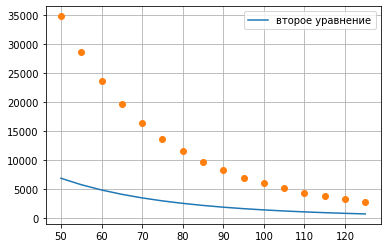

In [236]:
betaBest = np.zeros([3,1])
beta = np.array([[0.005], [5000], [280]])  # значения достаточно близкие к "финальным"
j = 0
while True:   #
    beta = gaus_newton(beta)
    j += 1
    if LSM(beta) < LSM(betaBest):
        betaBest = beta
        jNow = j
    else:
        if j - jNow > j / 10 + 10:
            beta = betaBest
            break
print(beta)
plt.plot(xT, func(xT, beta), label = 'второе уравнение')
plt.plot(xT,yT, 'o')
plt.grid()
plt.legend()

Как видно, функция была аппроксимирована плохо, то есть алгоритм Гаусса-Ньютона не сошелся. Что делать в этом случае?  
Можно продолжить более отчно подбирать значения, но мне посоветовали другой способ решения.  
### Решение с приминением библеотеки scipy.optimize
Есть такая прекрасная библеотека scipy.optimize, в которой етсь функция curve_fit$^{[2]}$. Эта функция использует метод 
наименьших квадратов, чтобы аппроксимировать функцию. Возвращает два массива: popt - одномерный массив оптимальных значений 
неизвестных и pcov - двумерный массив, который нам не понадобится.

In [237]:
from scipy.optimize import curve_fit
def fun(x, b1, b2):
    return b1*exp(1)**(-1*b2*x)
def fun1(x, b1, b2, b3):
    return b1*exp(1)**(b2/(x+b3))
res, waste = curve_fit(fun, xT, yT)
res1, waste = curve_fit(fun1, xT, yT)
print(res)
print(res1)
plt.plot(xT,yT, 'o')
plt.plot(xT, fun(xT, *res), label = 'первое уравнение')
plt.plot(xT, fun1(xT, *res1), label = 'второе уравнение')
plt.grid()
plt.legend()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

Но и тут не все просто. У первой функции значения расчитываются неверно, а вторая выдает ошибку. Для первой функции нужно 
задать начальное приближение вручную, они у нас как раз есть.  
Для второй необходимо увеличить максимальное кол-во итераций. Опытным путем было выялено, что это число - 17500

[2.02261435e+05 3.55594786e-02]
[6.24484526e-03 6.08987471e+03 3.42051184e+02]


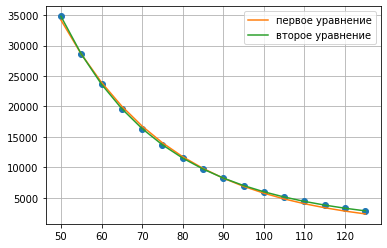

In [238]:
start_data = [1000, 0.05]  # добавляем начальное приближение
def fun(x, b1, b2):
    return b1*exp(1)**(-b2*x)
def fun1(x, b1, b2, b3):
    return b1*exp(1)**(b2/(x+b3))
res, waste = curve_fit(fun, xT, yT, start_data)
res1, waste = curve_fit(fun1, xT, yT, maxfev = 17500) # прописываем максимальное кол-во итераций
print(res)
print(res1)
plt.plot(xT,yT, 'o')
plt.plot(xT, fun(xT, *res), label = 'первое уравнение')
plt.plot(xT, fun1(xT, *res1), label = 'второе уравнение')
plt.grid()
plt.legend()

Как видно, обе функции были хорошо потсроены. Поэтому можно перейти к нахождению ощей ошибки в каждом из случаев.

#### Поиск общей ошибки
Так как был использован МНК, то стоит искать средний квадрат ошибки$^{[3]}$. В контексте нашей задачи это будет выглядеть так:
$$\frac{1}{16}\sum_{i=1}^{16} \left(f_i(\beta, x_i) - y_i \strut\right)^2$$ 

In [239]:
# считаем
sum1 = 0
sum2 = 0
sum3 = 0
for i in range(0,16):
    sum1 += (fun(xT[i], *res) -yT[i])**2
for i in range(0,16):
    sum2 += (fun(xT[i], *toFindErr) -yT[i])**2
for i in range(0,16):
    sum3 += (fun1(xT[i], *res1) -yT[i])**2    
sum1 /= 16
sum2 /= 16
sum3 /= 16
print("Общая ошибка первой функции при использовании алгоритма Гаусса-Ньютона -", sum1)
print("Общая ошибка первой функции при использовании функции curve_fit -", sum2)
print("Общая ошибка второй функции при использовании функции curve_fit -", sum3)

Общая ошибка первой функции при использовании алгоритма Гаусса-Ньютона - 122814.78083625017
Общая ошибка первой функции при использовании функции curve_fit - 125559.70032092482
Общая ошибка второй функции при использовании функции curve_fit - 8.841784846904305


#### Подведение итогов
Результаты меня очень удивили.  
1. Ошибка первой функции в более чем в 15'000 раз больше чем ошибка второй, но при этом они 
почти не отличаются на графике, а это значит, что общая ошибка может быть очень большой, но при этом не сильно влиять на 
правильность аппроксимации функции и ее вид.  
2. Разница между алгоритмом Гаусса-Ньютона и функцией curve_fit незначительна.

### Литература
1. https://habr.com/ru/post/419453/  
2. https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html  
3. Лекция №7 https://drive.google.com/file/d/1Ib7ouQQatDTVS0_FzN7F8cjIdcWVOsjz/view